# Point in Polygon
## Damien Allison, Drew Mattson, Caleb Andreano

### Computational Problem:
Given a series of two-dimensional points whose composition creates a simple polygon, determine if a distinct point is within the polygon.

### Decision Rule:
<Placeholder: A one-paragraph description of a "decision rule" that can be applied to solve the problem.>
<Placeholder: Provide at least two examples illustrating how the rule is applied>

### Pseudocode:
<Placeholder: High-level pseudocode for an algorithm that uses your rule to solve the computational problem for all inputs>

### Justification:
<Placeholder: A 1-3 paragraph justification of why your algorithm is correct.>

### Asymptotic Analysis of the worst-case run-time of your algorithm
<Placeholder: Asymptotic Analysis of the worst-case run-time of your algorithm>

### Test Cases:
<Placeholder: A table of your test cases. For each describe the input, the answer you would expect to get, and the actual answer>

### Benchmarking:
<Placeholder: A table and graph from benchmarking your implementation on problem instances of different sizes

### Theory vs Actuality
<Placeholder: A paragraph comparing your benchmarking results to your theoretical asymptotic run-time.> 
<Placeholder: This should include an explanation of whether your results support your theoretically-derived run-time.>

In [22]:
def plot(poly, point):
    x, y = point
    fig, ax = plt.subplots()
    ax.set_xlim(min(poly, key=lambda p: p[0])[0] - 1, max(poly, key=lambda p: p[0])[0] + 1)
    ax.set_ylim(min(poly, key=lambda p: p[1])[1] - 1, max(poly, key=lambda p: p[1])[1] + 1)
    ax.add_patch(Polygon(poly, closed=True, fill=False, color='g', linewidth=2))
    plt.plot(x, y, 'ro', label=f'{x}, {y}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polygon with point ({x}, {y})')
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
import math


# The intersection function returns the point of intersection between the
# line that is made from p1 and p0 and the horizontal line y.
def intersection(p1, p0, y):
    return math.nan \
        if p1[1] - p0[1] == 0 \
        else -(y * (p1[0] - p0[0]) - p0[1] * (p1[0] - p0[0]) - p0[0] * (p1[1] - p0[1])) / (p1[1] - p0[1])


def in_bounds(min_x, intersect_x, max_x):
    return not math.isnan(intersect_x) and min_x <= intersect_x <= max_x


# The inside function determines if a point is inside a polygon made of other points.
def in_polygon(points, target):
    count = 1 if points[0][1] == target[1] else 0
    max_x = points[0][0]
    # Finds the bounds that the intersections must be made in.
    for p in points:
        max_x = p[0] if max_x < p[0] else max_x
        count = count + 1 if p[1] == target[1] else count
    # min_x is the x value of the target point.

    # A point is within the polygon if the number of intersections
    # within the bounds is an odd number. This is accomplished by a
    # series of function calls.

    # The filter function will remove all points that do not have
    # intersections within the bounds. The filter function also returns
    # an iterator which must be converted into a list before the remaining
    # elements can be counted. If the length is odd, then return true.
    count += len(list(filter(
        # This lambda function is used by the filter to iterate through all
        # lines created by the points within the points list and to check if
        # the intersection with the horizontal line y is within bounds.
        # If it is, the point is kept within the array.
        lambda i: in_bounds(
            target[0],
            intersection(points[i], points[(i + 1) % len(points)], target[1]),
            max_x),
        range(len(points))
    )))

    return count % 2 == 1

True


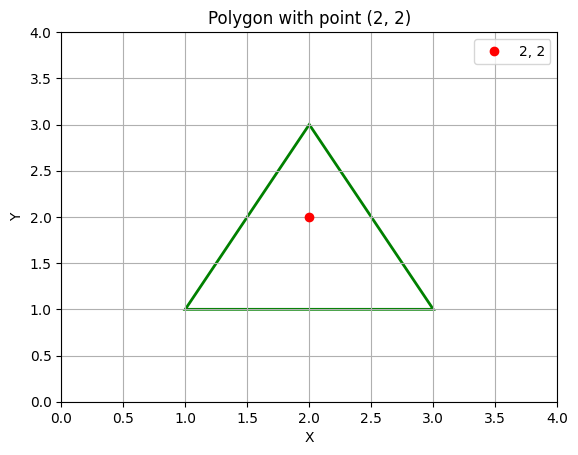

True


In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def point_inside_polygon(x, y, poly):
    # throw out point immediately

    n = len(poly)  # n = number of vertices
    inside = False
    p1x, p1y = poly[0]  # poly is an array of tuples, representing (x, y) points
    for i in range(n + 1):  # number of pairs + (last, first)
        p2x, p2y = poly[i % n]  # p2 will be poly[0] when i = len
        if y > min(p1y, p2y) and y <= max(p1y, p2y):  # if we're in the y bound   
            if x <= max(p1x, p2x):  # if we're between x = 0 and the maximum x bound
                if p1y != p2y:  # otherwise, we have a line with the same height, not going to intersect
                    xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x  # x intercept = this equation
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y


    return inside


polygon = [(1, 1), (2, 3), (3, 1)]
point = (2, 2)
print(point_inside_polygon(point[0], point[1], polygon))  # inside: True
plot(polygon, point)
print(in_polygon(polygon, point))  # inside: True


Test Case 1:


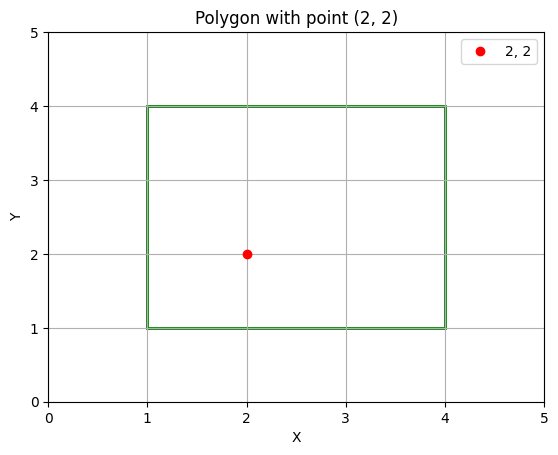

Point inside polygon: True
In Polygon: True

Test Case 2:


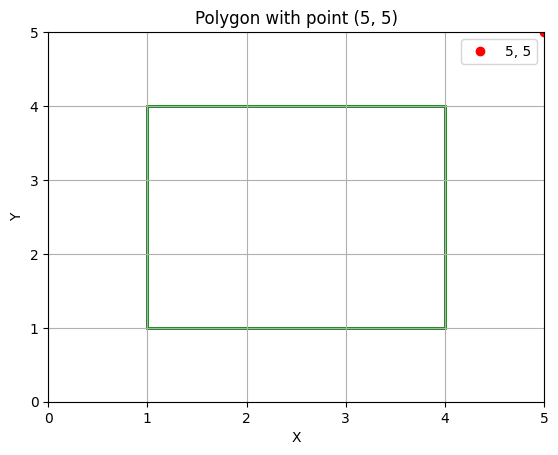

Point outside polygon: False
In Polygon: False

Test Case 3:


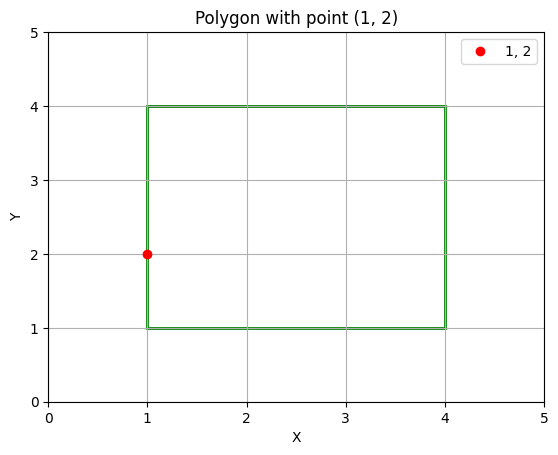

Point on the boundary of the polygon: False
In Polygon: False


In [25]:
# Test Case 1: Point inside the polygon
polygon1 = [(1, 1), (1, 4), (4, 4), (4, 1)]
point1 = (2, 2)

# Test Case 2: Point outside the polygon
polygon2 = [(1, 1), (1, 4), (4, 4), (4, 1)]
point2 = (5, 5)

# Test Case 3: Point on the boundary of the polygon
polygon3 = [(1, 1), (1, 4), (4, 4), (4, 1)]
point3 = (1, 2)

# Test Case 4: Complex polygon with a hole
polygon4 = [(1, 1), (1, 6), (6, 6), (6, 1)]
hole = [(2, 2), (2, 5), (5, 5), (5, 2)]
point4_inside = (3, 3)
point4_outside = (4, 4)

print("Test Case 1:")
plot(polygon1, point1)
print("Point inside polygon:", point_inside_polygon(point1[0], point1[1], polygon1))
print("In Polygon:", in_polygon(polygon1, point1))
print("\nTest Case 2:")
plot(polygon2, point2)
print("Point outside polygon:", point_inside_polygon(point2[0], point2[1], polygon2))
print("In Polygon:", in_polygon(polygon2, point2))
print("\nTest Case 3:")
plot(polygon3, point3)
print("Point on the boundary of the polygon:", point_inside_polygon(point3[0], point3[1], polygon3))
print("In Polygon:", in_polygon(polygon3, point3))